In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Tehtävä 3

In [127]:
titanic_data_df = pd.read_csv('./work/viikko2/datasets/Titanic_data.csv')
titanic_names_df = pd.read_csv('./work/viikko2/datasets/Titanic_names.csv')

In [128]:
titanic_joined_df = titanic_data_df.merge(titanic_names_df, how='inner', on='id')
titanic_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1313 non-null   int64  
 1   PClass      1313 non-null   object 
 2   Age         1313 non-null   float64
 3   Gender      1313 non-null   object 
 4   Survived    1313 non-null   int64  
 5   GenderCode  1313 non-null   int64  
 6   Name        1313 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


In [129]:
titanic_joined_df.describe()

,id,Age,Survived,GenderCode
count,1313.000000,1313.000000,1313.000000,1313.000000
mean,657.000000,17.502574,0.342727,0.351866
std,379.174762,18.516945,0.474802,0.477734
min,1.000000,0.000000,0.000000,0.000000
25%,329.000000,0.000000,0.000000,0.000000
50%,657.000000,18.000000,0.000000,0.000000
75%,985.000000,30.000000,1.000000,1.000000
max,1313.000000,71.000000,1.000000,1.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'GenderCode'}>]], dtype=object)

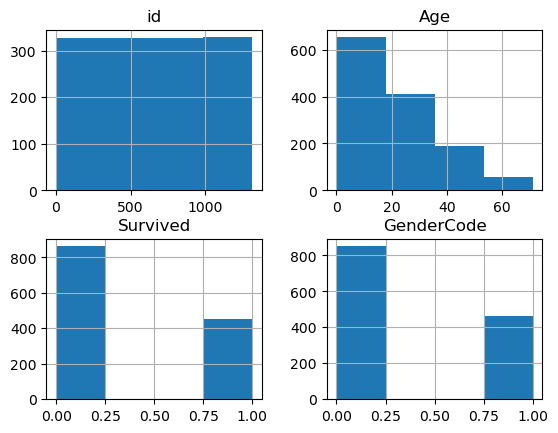

In [130]:
titanic_joined_df.hist(bins=4)

In [131]:
titanic_joined_df.shape[0]

1313

In [132]:
titanic_joined_df['Gender'].value_counts()

Gender
male      851
female    462
Name: count, dtype: int64

In [133]:
titanic_joined_df['Age'].mean().round()

18.0

In [134]:
titanic_joined_df[titanic_joined_df['Age'] == 0].shape[0]

557

# Tehtävä 4

In [135]:
mean_age = titanic_joined_df[titanic_joined_df['Age'] != 0]['Age'].mean().round()
titanic_joined_df.loc[titanic_joined_df['Age'] == 0, 'Age'] = mean_age

In [136]:
titanic_joined_df['PClass'].unique()

array(['1st', '2nd', '*', '3rd'], dtype=object)

In [139]:
titanic_joined_df[titanic_joined_df['PClass'] == '*']

,id,PClass,Age,Gender,Survived,GenderCode,Name
456,457,*,30.0,male,0,0,Jacobsohn Mr Samuel


In [140]:
titanic_joined_df['Survived'].value_counts()

Survived
0    863
1    450
Name: count, dtype: int64

In [142]:
titanic_joined_df['Survived'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Survived
0    65.7%
1    34.3%
Name: proportion, dtype: object